# CLClim0NE: Visualize the results of the CLClim0NE protein outputs compared to those in the original model

In [2]:
import pickle
import os
import pandas as pd
from matplotlib import pyplot as plt
os.chdir(os.path.expanduser('~/wcEcoli/out/'))
# noinspection PyUnresolvedReferences
import numpy as np
import plotly.graph_objects as go
from models.ecoli.analysis import cohortAnalysisPlot
from wholecell.analysis.analysis_tools import (exportFigure,
	read_bulk_molecule_counts, read_stacked_bulk_molecules, read_stacked_columns)
from wholecell.io.tablereader import TableReader
from sklearn.metrics import r2_score

# Load in the simulation data for the original model (CLNE) and the CLClim0NE model

In [3]:
# CLNE # todo explain how I got this data from running a sim and runing the cohort save data file 

VS_log_CLNE = pd.read_csv('PDR_CLNE/wildtype_000000/cohort_saved_protein_count_data/validation_data/log_data/Log10_Schmidt_Comparison_startGen_2.csv')
VW_log_CLNE = pd.read_csv('PDR_CLNE/wildtype_000000/cohort_saved_protein_count_data/validation_data/log_data/Log10_Wisniewski_Comparison_startGen_2.csv')

# CLClimNE
VS_log_CLClimNE = pd.read_csv('CLClimNE/wildtype_000000/cohort_saved_protein_count_data/validation_data/log_data/Log10_Schmidt_Comparison_startGen_2.csv')
VW_log_CLClimNE = pd.read_csv('CLClimNE/wildtype_000000/cohort_saved_protein_count_data/validation_data/log_data/Log10_Wisniewski_Comparison_startGen_2.csv')

In [4]:
# specifiy the current sequence being used: 
current_sequence = 'CLClim0NE'
Clim_name = 'Clim0'

# Schmidt Validation Data Comparisons


Plot #1: Compare the Schmidt Validation Protein Counts for the CLNE and CLClim0NE models

In [5]:
# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline trace
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, VS_log_CLNE, 'CLNE vs Schmidt')
add_scatter_and_trendline(fig, VS_log_CLClimNE, (current_sequence +' vs Schmidt'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Schmidt Validation Protein Counts vs CLNE and {current_sequence}",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

Plot #1.a: Compare the Schmidt Validation Protein Counts for the CLNE and CLClim0NE models but with seaborn.

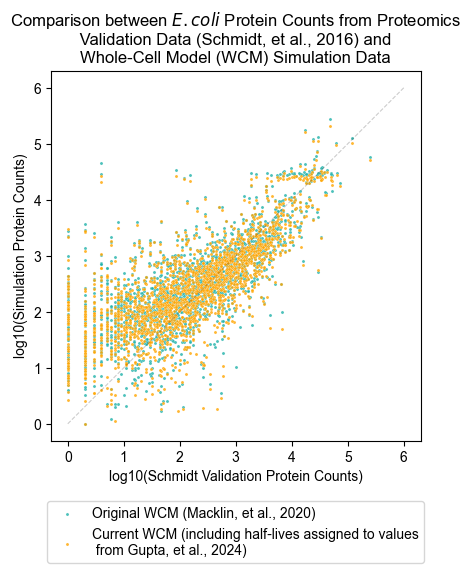

In [6]:
import seaborn as sns

# TODO: ask nora if this should be normalized by the total protein counts in the validation data? the way I did for cyrus's data?

# Plot the data:
sns.scatterplot(x="Log10 Validation Schmidt Counts", y="Log10 Simulated Schmidt Counts", data=VS_log_CLNE, s=5, color='lightseagreen', alpha=.8)
sns.scatterplot(x="Log10 Validation Schmidt Counts", y="Log10 Simulated Schmidt Counts", data=VS_log_CLClimNE, s=5, color="orange", alpha=.8)

# find the max value of the plot for making a y=x line: 
max_vals = [max(VS_log_CLNE["Log10 Validation Schmidt Counts"]), max(VS_log_CLNE["Log10 Simulated Schmidt Counts"])]; max_val = round(max(max_vals))
yxvals = range(0, max_val + 2) 
plt.plot(yxvals, yxvals, linewidth=.8, linestyle="dashed", color="black", alpha=.2); 

# plot specs
plt.xlabel("log10(Schmidt Validation Protein Counts)")
plt.ylabel(f"log10(Simulation Protein Counts)")
plt.axis('square')
plt.title("Comparison between $\t{E. coli}$ Protein Counts from Proteomics \n Validation Data (Schmidt, et al., 2016) and \nWhole-Cell Model (WCM) Simulation Data")
plt.legend(["Original WCM (Macklin, et al., 2020)", "Current WCM (including half-lives assigned to values\n from Gupta, et al., 2024)",], bbox_to_anchor=(.5, -.35), loc='lower center')

This is the same plot as above, but I normalized one set to the other. Not sure that it changed anything though.

Plot #2: Compare the Schmidt Validation Protein Counts for the CLNE and CLClim0NE models (but filter values below log10(2))

In [7]:
# Plot the simulation protein counts against the validation counts, filtering out proteins with counts below log10(2) (these are likely to be subgenerational proteins) 
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter 
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline for data 
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline 
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# filter out any counts below log10(2):
VS_log_CLNE_filtered = VS_log_CLNE[(VS_log_CLNE["Log10 Validation Schmidt Counts"] > 2) & (VS_log_CLNE["Log10 Simulated Schmidt Counts"] > 2)]
VS_log_CLClimNE_filtered = VS_log_CLClimNE[(VS_log_CLClimNE["Log10 Validation Schmidt Counts"] > 2) & (VS_log_CLClimNE["Log10 Simulated Schmidt Counts"] > 2)]

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, VS_log_CLNE_filtered, 'CLNE vs Schmidt')
add_scatter_and_trendline(fig, VS_log_CLClimNE_filtered, (current_sequence +' vs Schmidt'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Schmidt Validation Protein Counts vs CLNE and {current_sequence} (filtered for counts > log10(2))",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[2, 6], y=[2, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

# Wisniewski Validation Data Comparisons

Plot #3: Compare the Wisniewski Validation Protein Counts for the CLNE and CLClim0NE models

In [8]:
# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Wisniewski Counts"]
    y = df["Log10 Simulated Wisniewski Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline trace
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, VW_log_CLNE, 'CLNE vs Wisniewski')
add_scatter_and_trendline(fig, VW_log_CLClimNE, (current_sequence +' vs Wisniewski'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Wisniewski Validation Protein Counts vs CLNE and {current_sequence}",
    xaxis_title="log10(Wisniewski Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

Plot #4: Compare the Wisniewski Validation Protein Counts for the CLNE and CLClim0NE models (but filter values below log10(2))

In [9]:
# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Wisniewski Counts"]
    y = df["Log10 Simulated Wisniewski Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline trace
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
# filter out any counts below log10(2):
VW_log_CLNE = VW_log_CLNE[(VW_log_CLNE["Log10 Validation Wisniewski Counts"] > 2) & (VW_log_CLNE["Log10 Simulated Wisniewski Counts"] > 2)]
VW_log_CLClimNE = VW_log_CLClimNE[(VW_log_CLClimNE["Log10 Validation Wisniewski Counts"] > 2) & (VW_log_CLClimNE["Log10 Simulated Wisniewski Counts"] > 2)]
add_scatter_and_trendline(fig, VW_log_CLNE, 'CLNE vs Wisniewski')
add_scatter_and_trendline(fig, VW_log_CLClimNE, (current_sequence +' vs Wisniewski'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Wisniewski Validation Protein Counts vs CLNE and {current_sequence}",
    xaxis_title="log10(Wisniewski Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[2, 6], y=[2, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

# Plot of the proteases in the ClimNE model

In [10]:
# FUNCTIONS

# get the gene IDs for each monomer IDs:
def get_gene_ids_for_monomer_ids():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    RNAS_FILE = os.path.join(ROOT_PATH, 'reconstruction', 'ecoli', 'flat', 'rnas.tsv')
    with io.open(RNAS_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_id_index = headers.index('gene_id')
        protein_id_index = headers.index('monomer_ids')
        monomer_ids_to_gene_ids = {}
        for line in reader:
            gene_id = line[gene_id_index]
            protein_id = list(line[protein_id_index][2:-2].split('", "'))[0]
            monomer_ids_to_gene_ids[protein_id] = gene_id

        return monomer_ids_to_gene_ids
    
def get_gene_symbols_for_monomer_ids():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    RNAS_FILE = os.path.join(ROOT_PATH, 'reconstruction', 'ecoli', 'flat', 'rnas.tsv')
    with io.open(RNAS_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_symbol_index = headers.index('common_name')
        protein_id_index = headers.index('monomer_ids')
        monomer_ids_to_gene_symbols = {}
        for line in reader:
            gene_symbol = line[gene_symbol_index]
            protein_id = list(line[protein_id_index][2:-2].split('", "'))[0]
            monomer_ids_to_gene_symbols[protein_id] = gene_symbol

        return monomer_ids_to_gene_symbols
    
    
# convert gene IDs to monomer IDs:
def get_monomer_ids_for_gene_ids():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    RNAS_FILE = os.path.join(ROOT_PATH, 'reconstruction', 'ecoli', 'flat', 'rnas.tsv')
    with io.open(RNAS_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_id_index = headers.index('gene_id')
        protein_id_index = headers.index('monomer_ids')
        gene_ids_to_monomer_ids = {}
        for line in reader:
            gene_id = line[gene_id_index]
            protein_id = list(line[protein_id_index][2:-2].split('", "'))[0]
            gene_ids_to_monomer_ids[gene_id] = protein_id

        return gene_ids_to_monomer_ids
    
    
# recall the genes defined as "essential" in the model, and return them as a list of gene names:
def get_essential_genes():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    GENES_FILE = os.path.join(ROOT_PATH, 'validation', 'ecoli', 'flat', 'essential_genes.tsv')
    with io.open(GENES_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_id_index = headers.index('FrameID')
        essential_genes = []
        for line in reader:
            essential_gene = line[gene_id_index]
            essential_genes.append(essential_gene)

        return essential_genes
	
	
# convert the data from the ParCa translation.py raw HL saves: 
def convert_HL_data(dataframe):
    name_s = 'rate constant (s^1)' # name in seconds
    name_m = 'half life (min)' # name in mins
    dataframe.rename(columns={'Rate Constant': name_s}, inplace=True)
    dataframe[name_m] = dataframe[name_s] * 60 * (1/np.log(2))
    dataframe[name_m] = 1 / dataframe[name_m] # units of mins
    return dataframe


# convert each data source in the saved HL data file folders 
def convert_data_and_add_HL_source(dataframe, HL_source):
    name_s = HL_source + ' rate constant (s^1)' # name in seconds
    name_m = HL_source + ' half life (min)' # name in mins
    dataframe.rename(columns={'Rate Constant': name_s}, inplace=True)
    dataframe[name_m] = dataframe[name_s] * 60 * (1/np.log(2))
    dataframe[name_m] = 1 / dataframe[name_m] # units of mins
    return dataframe
    


In [11]:
# load in the protease-substrate assignment datatable: 
protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST2_protease_assignment_data.xlsx')

# determine if any of the proteins assigned to a protease are considered an essential gene in the model: 
essential_substrate_gene_symbols = []
for gene in get_essential_genes():
    if get_gene_symbols_for_monomer_ids()[get_monomer_ids_for_gene_ids()[gene]] in protease_data['Gene name'].values:
        essential_substrate_gene_symbols.append(get_gene_symbols_for_monomer_ids()[get_monomer_ids_for_gene_ids()[gene]])
        
print("There are " + str(len(protease_data['Gene name'].values)) + " proteins assigned to a protease in the Gupta et al., 2024 data.")
print("Essential Genes in Model that are Assigned to a Protease (" +str(len(essential_substrate_gene_symbols))+"): ", essential_substrate_gene_symbols)

There are 308 proteins assigned to a protease in the Gupta et al., 2024 data.
Essential Genes in Model that are Assigned to a Protease (57):  ['bioB', 'ilvE', 'argA', 'aroE', 'cysH', 'cysI', 'cysJ', 'cysN', 'leuA', 'leuC', 'leuD', 'lysA', 'thrA', 'trpB', 'tyrA', 'iscS', 'nadA', 'nadB', 'metR', 'ispH', 'ftsI', 'ftsQ', 'ftsZ', 'lpxC', 'erpA', 'frr', 'dxr', 'ispU', 'dnaE', 'thiL', 'dnaX', 'ftsK', 'rpsA', 'mukB', 'acpP', 'minE', 'hemA', 'folE', 'ligA', 'dapA', 'ispG', 'era', 'ffh', 'metK', 'parE', 'ribB', 'obgE', 'def', 'rplX', 'dnaA', 'birA', 'rpoB', 'rpoC', 'ubiA', 'lexA', 'dnaB', 'dnaC']


In [12]:
# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
monomer_ids = VS_log_CLClimNE['Monomer ID']
monomer_ids = monomer_ids.str.slice(0, -3)

CLClim0NE_protease_substrate_gene_symbols = []
CLClim0NE_protease_substrate_monomer_ids = []
for monomer_id in monomer_ids:
	monomer = monomer_id
	gene_symbol = get_gene_symbols_for_monomer_ids()[monomer]
	if gene_symbol in protease_data['Gene name'].values:
		CLClim0NE_protease_substrate_gene_symbols.append(gene_symbol)
		CLClim0NE_protease_substrate_monomer_ids.append(monomer)
        
print("Total Protease Substrates in VS CLClimNE (" +str(len(CLClim0NE_protease_substrate_gene_symbols))+"): ", CLClim0NE_protease_substrate_gene_symbols)

VS_log_CLClimNE['gene symbol'] = VS_log_CLClimNE['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]]) # this is to add to the hovertext
# if a monomer in CLClim0NE_protease_substrate_gene_symbols is found in monomer_ids, remove them from Clim0_data and add it to a new dataframe: 
CLClim0NE_protease_substrate_idxs = monomer_ids.isin(CLClim0NE_protease_substrate_monomer_ids)
CLClim0NE_protease_substrates = VS_log_CLClimNE[CLClim0NE_protease_substrate_idxs].copy()
CLClim0NE_protease_substrates['HL Source'] = f"{current_sequence} (protease substrate)"
CLClim0NE_VS_log_data_remaining = VS_log_CLClimNE[~CLClim0NE_protease_substrate_idxs].copy()

Total Protease Substrates in VS CLClimNE (236):  ['yidA', 'nfuA', 'argA', 'treF', 'gsiA', 'dnaX', 'rlmN', 'ppiC', 'acpP', 'aroG', 'yibA', 'otsA', 'ydcF', 'nrdD', 'fbp', 'tyrA', 'chbB', 'bioB', 'yacC', 'bisC', 'fadB', 'yihI', 'ibpA', 'putA', 'lpxC', 'yjjU', 'ydcI', 'ybgI', 'cysI', 'thiM', 'clpA', 'aroE', 'cfa', 'topB', 'sbcD', 'cspE', 'mutS', 'clpX', 'guaD', 'ydhS', 'nudL', 'ftsZ', 'recF', 'znuC', 'ybeZ', 'dksA', 'sbcC', 'hmp', 'ydbK', 'def', 'nadA', 'ypfH', 'ubiC', 'iscR', 'yjgA', 'zntA', 'greB', 'ligA', 'hemA', 'yhgF', 'mnmG', 'sufB', 'hemE', 'narP', 'uvrY', 'ahpF', 'yegW', 'ispG', 'sad', 'glnD', 'rsuA', 'sixA', 'elaA', 'yfcZ', 'ybjI', 'erpA', 'ribB', 'dapA', 'dnaA', 'folX', 'fadE', 'arnA', 'rplX', 'ygaP', 'uhpA', 'aroK', 'uvrD', 'csdA', 'ychF', 'ppx', 'astC', 'fnr', 'intF', 'yfaY', 'mpaA', 'nadB', 'rnk', 'secG', 'bolA', 'ilvE', 'miaB', 'ftsI', 'radA', 'trxC', 'ydeP', 'yggX', 'cysH', 'selD', 'iscS', 'yiiQ', 'cycA', 'aroD', 'hflX', 'nemA', 'hscB', 'cysD', 'tatB', 'avtA', 'gdhA', 'azoR'

In [13]:
import numpy as np
import plotly.graph_objs as go

# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]
	
    # Properly indented if statement
    if is_protease_substrate == True:
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', 
                                  marker_size=7, marker=dict(color="orange", symbol='star'), 
                                  name=name))
    else: 
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker_size=4,
                                 marker=dict(color="lightseagreen"),  name=name))
		
        # Compute trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        trendline_y = p(x)
    
        # Add trendline trace
        fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', line=dict(color="salmon"), name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, CLClim0NE_VS_log_data_remaining, (current_sequence + ' vs Schmidt'))
add_scatter_and_trendline(fig, CLClim0NE_protease_substrates, (current_sequence + '(protease substrates) vs Schmidt'), True)

# Update layout
fig.update_layout(
    title=f"Schmidt Validation Protein Counts vs {current_sequence}",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10({current_sequence})",
    autosize=False,
    width=1200,
    height=1000
)

# Add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=dict(color="black", dash="dash"), opacity=0.2,
        name="y=x"))

# Show figure
fig.show()


# Proposal plots

## Different plots 

Plot a: comparison of the original model to the new CLClime0NE model

Plot b: plot of CLClime0NE model (with the protease substrates highlighted) plotted against Schmidt data

Plot c: plot of the half-lives assigned to Clim0 valuesin CLClime0NE model (with the protease substrates highlighted) that were originally assigned to 10 hours by NE in the original model

Plot d: plot of the half-lives assigned to Clim0 values in CLClime0NE model (with the protease substrates highlighted) that were originally assigned to 2 mins in the NE in the original model

In [45]:
# first find the monomer IDs that are substrates of the proteases in the CLClim0NE model:
protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST2_protease_assignment_data.xlsx')

# read in the unfiltered data: 
CLClimNE_log_data_with_proteases = pd.read_csv('~/wcEcoli/out/CLClimNE/wildtype_000000/cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# add the gene symbols to the dataframe:

CLClimNE_log_data_with_proteases['gene symbol'] = CLClimNE_log_data_with_proteases['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])
CLClimNE_log_data_with_proteases['protease assignement'] = "NA"

# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
gene_ids = CLClimNE_log_data_with_proteases['gene symbol']

CLClim0NE_full_protease_substrate_gene_symbols = []
for gene_id in gene_ids:
    if gene_id in protease_data['Gene name'].values:
        CLClim0NE_full_protease_substrate_gene_symbols.append(gene_id)
        protease_row = protease_data[protease_data['Gene name'] == gene_id]
        protease = protease_row['Protease assignment'].values[0]  # Extract the protease assignment
        # change the protease assignment for the gene id in the dataframe:
        CLClimNE_log_data_with_proteases.loc[CLClimNE_log_data_with_proteases['gene symbol'] == gene_id, 'protease assignement'] = protease

print("Total Protease Substrates in CLClim0NE (" +str(len(CLClim0NE_full_protease_substrate_gene_symbols))+"): ", CLClim0NE_full_protease_substrate_gene_symbols)


# figure out which proteins were assigned to lon in the model: 
lon_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Lon only']
lon_proteins

# figure out which proteins were assigned to clp in the model:
clp_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'ClpP only']

hslv_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'HslV only']

# figure out which proteins are additive in the model: 
additive_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Additive']

# figure out which proteins are redundant in the model: 
redundant_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Redundant']

# figure out which proteins are assinged as "unexplained" in the model: 
unexplained_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Actively degrading in Tripple KO']

# figure out which proteins were not assigned to a protease in the model:
no_protease_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'NA']

# todo: note that these numbers will not add up to those in the graph below bc some proteins in the CLClim0NE model are not in the CLNE model 
#298 total 
print("Lon Proteins(" +str(len(lon_proteins))+"): ", list(lon_proteins['gene symbol'])) #14
print("ClpP Proteins(" +str(len(clp_proteins))+"): ", list(clp_proteins['gene symbol'])) #63
print("HslV Proteins(" +str(len(hslv_proteins))+"): ", list(hslv_proteins['gene symbol'])) #1
print("Additive Proteins(" +str(len(additive_proteins))+"): ", list(additive_proteins['gene symbol'])) #79
print("Redundant Proteins(" +str(len(redundant_proteins))+"): ", list(redundant_proteins['gene symbol'])) #39
print("Unexplained Proteins(" +str(len(unexplained_proteins))+"): ", list(unexplained_proteins['gene symbol'])) #102
#print("No Protease Proteins(" +str(len(no_protease_proteins))+"): ", list(no_protease_proteins['gene symbol'])) # 4012


Total Protease Substrates in CLClim0NE (298):  ['leuA', 'ubiA', 'ackA', 'acnB', 'fadE', 'cyaA', 'adhP', 'glpD', 'cysJ', 'uxaA', 'astA', 'aroD', 'aroE', 'aroG', 'aroK', 'aroL', 'asnA', 'aspA', 'thrA', 'cysI', 'bioB', 'birA', 'ilvE', 'chbB', 'cfa', 'tyrA', 'ubiC', 'cycA', 'cysD', 'cysN', 'dadA', 'lysA', 'dapA', 'nfsB', 'ribB', 'cobT', 'dxr', 'yaaA', 'bisC', 'bolA', 'clpA', 'clpX', 'dedA', 'dedD', 'flk', 'dksA', 'dnaB', 'dnaC', 'dnaE', 'dnaK', 'dnaQ', 'era', 'ffh', 'frr', 'ftsI', 'ftsQ', 'ftsZ', 'ispG', 'mnmG', 'greA', 'helD', 'hflX', 'hmp', 'hsdM', 'hypE', 'ligA', 'mazG', 'minE', 'mukB', 'mutS', 'nfo', 'parC', 'parE', 'pcnB', 'phnO', 'priC', 'pspA', 'recA', 'recD', 'recF', 'recJ', 'rhlB', 'rplX', 'rpsA', 'ruvC', 'sbcC', 'selD', 'prlF', 'srmB', 'tag', 'tonB', 'topB', 'uvrB', 'uvrD', 'ispH', 'yacC', 'sbcD', 'ybaB', 'relE', 'yebC', 'yecA', 'uvrY', 'yibA', 'yidA', 'mioC', 'ybhA', 'rlmD', 'mazF', 'radA', 'rng', 'lipA', 'dinG', 'ahpC', 'ahpF', 'ychF', 'yjgA', 'dps', 'def', 'yigI', 'ycgB', 'ibp

# Pre plot: try to split up by protease assignment

In [46]:
## Create scatter plot of CLNE counts to CLClim0NE counts, but color the protiens based on their protease assignment in the CLClim0NE model
# create the plot!
# TODO: do I need to normalize the data? and how do I get the plot to be an exact square? and the figure title centered?
def CLNE_CLClimNE_plot_protease(fig, dataframe, protease=0):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    hovertext = dataframe["gene symbol"]
 
    # Add scatter trace
    if protease == 0: # no assignement
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"No Protease ({np.shape(dataframe)[0]})", marker=dict(color='orange', size=3, opacity=.5)))

    elif protease == 1: # no explaination
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Unexplained ({np.shape(dataframe)[0]})", marker=dict(color='deeppink', size=3, opacity=.5)))
        
    elif protease == 2: # redundant
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Redundant ({np.shape(dataframe)[0]})", marker=dict(color='lightseagreen', size=5, opacity=.9)))
        
    elif protease == 3: # additive
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Additive ({np.shape(dataframe)[0]})", marker=dict(color='blue', size=5, opacity=.9)))
        
    elif protease == 4: # lon
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Lon ({np.shape(dataframe)[0]})", marker=dict(color='red', size=5, opacity=.9)))
        
    elif protease == 5: # clp
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"ClpP ({np.shape(dataframe)[0]})", marker=dict(color='green', size=5, opacity=.9)))
        
    elif protease == 6: # hslv
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Hslv ({np.shape(dataframe)[0]})", marker=dict(color='yellow', size=5, opacity=.9)))



# Create figure
fig = go.Figure()

del CLClimNE_log_data_with_proteases
# first find the monomer IDs that are substrates of the proteases in the CLClim0NE model:
protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST2_protease_assignment_data.xlsx')

# read in the unfiltered data: 
CLClimNE_log_data_with_proteases = pd.read_csv('~/wcEcoli/out/CLClimNE/wildtype_000000/cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# figure out which proteins are shared between CLNE and CLClim0NE:
CLNE_log_data = pd.read_csv('~/wcEcoli/out/pdr_CLNE/wildtype_000000/cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# merge the two dataframes:
CLNE_log_data = CLNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLNE Protein Counts"})
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases.rename(columns={"Log10 Average Protein Count": "Log10 CLClim0NE Protein Counts"})
CLNE_log_data = CLNE_log_data[["Monomer ID", "Log10 CLNE Protein Counts"]]
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases[["Monomer ID", "Log10 CLClim0NE Protein Counts"]]
CLNE_log_data = CLNE_log_data.set_index("Monomer ID")
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases.set_index("Monomer ID")
CLNE_CLClimNE_log_data_proteases = CLNE_log_data.join(CLClimNE_log_data_with_proteases, how="inner")
CLNE_CLClimNE_log_data_proteases = CLNE_CLClimNE_log_data_proteases.reset_index()

# add the gene symbols to the dataframe:
CLNE_CLClimNE_log_data_proteases['gene symbol'] = CLNE_CLClimNE_log_data_proteases['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])
CLNE_CLClimNE_log_data_proteases['protease assignement'] = "NA"

# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
gene_ids = CLNE_CLClimNE_log_data_proteases['gene symbol']
for gene_id in gene_ids:
    if gene_id in protease_data['Gene name'].values:
        protease_row = protease_data[protease_data['Gene name'] == gene_id]
        protease = protease_row['Protease assignment'].values[0]  # Extract the protease assignment
        # change the protease assignment for the gene id in the dataframe:
        CLNE_CLClimNE_log_data_proteases.loc[CLNE_CLClimNE_log_data_proteases['gene symbol'] == gene_id, 'protease assignement'] = protease

# make a copy of the CLClimNE_log_data_with_proteases data:
CLClimNE_log_data_with_Lon_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Clp_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_HslV_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Additive_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Redundant_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Unexplained_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_no_protease_proteases = CLNE_CLClimNE_log_data_proteases.copy()

# remove the proteins that were not assigned to the protease in the model:
CLClimNE_log_data_with_Lon_proteases = CLClimNE_log_data_with_Lon_proteases[CLClimNE_log_data_with_Lon_proteases['protease assignement'] == 'Lon only']
CLClimNE_log_data_with_Clp_proteases = CLClimNE_log_data_with_Clp_proteases[CLClimNE_log_data_with_Clp_proteases['protease assignement'] == 'ClpP only']
CLClimNE_log_data_with_HslV_proteases = CLClimNE_log_data_with_HslV_proteases[CLClimNE_log_data_with_HslV_proteases['protease assignement'] == 'HslV only']
CLClimNE_log_data_with_Additive_proteases = CLClimNE_log_data_with_Additive_proteases[CLClimNE_log_data_with_Additive_proteases['protease assignement'] == 'Additive']
CLClimNE_log_data_with_Redundant_proteases = CLClimNE_log_data_with_Redundant_proteases[CLClimNE_log_data_with_Redundant_proteases['protease assignement'] == 'Redundant']
CLClimNE_log_data_with_Unexplained_proteases = CLClimNE_log_data_with_Unexplained_proteases[CLClimNE_log_data_with_Unexplained_proteases['protease assignement'] == 'Actively degrading in Tripple KO']
CLClimNE_log_data_with_no_protease_proteases = CLClimNE_log_data_with_no_protease_proteases[CLClimNE_log_data_with_no_protease_proteases['protease assignement'] == 'NA']

# now plot!

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_no_protease_proteases, 0)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Unexplained_proteases, 1)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Redundant_proteases, 2)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Additive_proteases, 3)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Lon_proteases, 4)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Clp_proteases, 5)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_HslV_proteases, 6)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
    line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
    name="y=x"));

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=900,
    height=600, 
    showlegend=True,
    legend_title="Protease Assignments")


# Show figure
fig.show()


Plot A: comparison of the original model to the new CLClime0NE model

In [15]:
# create a data frame that includes the log counts for the CLNE and CLClim0NE models:
# todo determine if I should use the validation data numbers still? or should I use the filtred and/or unfiltered data? and should I normalize one to the other? 
CLClimNE_log_data = pd.read_csv('~/wcEcoli/out/CLClimNE/wildtype_000000/cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

CLNE_log_data = pd.read_csv('~/wcEcoli/out/pdr_CLNE/wildtype_000000/cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# merge the two dataframes:
CLNE_log_data = CLNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLNE Protein Counts"})
CLClimNE_log_data = CLClimNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLClim0NE Protein Counts"})
CLNE_log_data = CLNE_log_data[["Monomer ID", "Log10 CLNE Protein Counts"]]
CLClimNE_log_data = CLClimNE_log_data[["Monomer ID", "Log10 CLClim0NE Protein Counts"]]
CLNE_log_data = CLNE_log_data.set_index("Monomer ID")
CLClimNE_log_data = CLClimNE_log_data.set_index("Monomer ID")
CLNE_CLClimNE_log_data = CLNE_log_data.join(CLClimNE_log_data, how="inner")
CLNE_CLClimNE_log_data = CLNE_CLClimNE_log_data.reset_index()

# add the gene symbols to the dataframe:
CLNE_CLClimNE_log_data['gene symbol'] = CLNE_CLClimNE_log_data['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])

CLNE_CLClimNE_log_data 

Monomer ID  Log10 CLNE Protein Counts   
0      1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]                   2.232672  \
1                                1-PFK-MONOMER[c]                   1.851104   
2             2-DEHYDROPANTOATE-REDUCT-MONOMER[c]                   2.340633   
3                 2-ISOPROPYLMALATESYN-MONOMER[c]                   3.478270   
4     2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]                   2.576354   
...                                           ...                        ...   
4163                              YTFQ-MONOMER[p]                   1.615861   
4164                              YTFT-MONOMER[i]                   1.584518   
4165                              ZNUA-MONOMER[p]                   2.937294   
4166                              ZNUB-MONOMER[i]                   1.791089   
4167                              ZNUC-MONOMER[i]                   1.909855   

      Log10 CLClim0NE Protein Counts gene symbol  
0                           2.175541        plsC  
1                           1.773497        fruK  
2                           2.341871        panE  
3                           3.376507        leuA  
4                           2.528826        ubiE  
...                              ...         ...  
4163                        1.794798        ytfQ  
4164                        1.739282        ytfT  
4165                        2.707542        znuA  
4166                        1.829062        znuB  
4167                        1.917735        znuC  

[4168 rows x 4 columns]

In [16]:
np.shape(CLClimNE_log_data), np.shape(CLNE_log_data), np.shape(CLNE_CLClimNE_log_data)
# TODO WHY ARE THESE NOT THE SAME??? WHAT PROTEINS ARE NOT SHARED??? 

((4310, 1), (4309, 1), (4168, 4))

In [17]:
# create the plot!
# TODO: do I need to normalize the data? and how do I get the plot to be an exact square? and the figure title centered?
def CLNE_CLClimNE_plot(fig, dataframe):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
 
    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', marker=dict(color='lightseagreen', size=3, opacity=.5)))

    # add a y=x line
    fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
    
# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot(fig, CLNE_CLClimNE_log_data)

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)


# Show figure
fig.show()

a.1: color by change in stability: 

In [18]:
leftover_df

NameError: name 'leftover_df' is not defined

In [32]:
## Create scatter plot of CLNE counts to CLClim0NE counts, but color the protiens based on how their stability changed
# create the plot!
# TODO: do I need to normalize the data? and how do I get the plot to be an exact square? and the figure title centered?
def CLNE_CLClimNE_plot_stability(fig, dataframe, stability=0):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    hovertext = dataframe["gene symbol"]
 
    # Add scatter trace
    if stability == 0: # same stability
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker=dict(color='orange', size=3, opacity=.5)))

    elif stability == 1: # less stable
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker=dict(color='deeppink', size=3, opacity=.5)))
        
    elif stability == 2: # more stable
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker=dict(color='lightseagreen', size=5, opacity=.9)))

    
# Create figure
fig = go.Figure()

# load in the stability file from the CLClim0NE model:
Clim_stability_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim0_using_biorxiv_2023_data/CLClim0NE/CLClim0NE_stability_change.csv')
stability_changes = Clim_stability_data[["Protein ID", "Stability"]]
stability_changes = stability_changes.rename(columns={"Protein ID": "Monomer ID"})

# make a copy of the CLNE_CLClimNE_log_data data:
CLNE_CLClimNE_log_data_stability = CLNE_CLClimNE_log_data.copy()

# remove the last three characters (like "[c]" for example) from the monomer IDs in the CLNE_CLClimNE_log_data data:
CLNE_CLClimNE_log_data_stability['Monomer ID'] = CLNE_CLClimNE_log_data_stability['Monomer ID'].apply(lambda x: x[:-3] if isinstance(x, str) else x)

# merge the stability data with the CLNE_CLClimNE_log_data:
merged_df = pd.merge(CLNE_CLClimNE_log_data_stability, stability_changes, on='Monomer ID', how='left')

# filter the dataframes based on the stability change:
more_stable_df = merged_df[merged_df['Stability'] == 'More Stable']
less_stable_df = merged_df[merged_df['Stability'] == 'Less Stable']
leftover_df = merged_df[merged_df['Stability'].isna()]


# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot_stability(fig, leftover_df, 0)
CLNE_CLClimNE_plot_stability(fig, more_stable_df, 2)
CLNE_CLClimNE_plot_stability(fig, less_stable_df, 1)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
    line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
    name="y=x"));

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)


# Show figure
fig.show()


In [ ]:
leftover_df

In [ ]:
# Create scatter plot of CLNE counts to CLClim0NE counts, normalized by the total counts in each dataset
# create the plot!
def CLNE_CLClimNE_plot_with_normalization(fig, dataframe):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    
    # normalize the data:
    x = (x / sum(x)) * sum(y)
 
    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', marker=dict(color='lightseagreen', size=4, opacity=.8)))

    # add a y=x line
    fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
    
# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot(fig, CLNE_CLClimNE_log_data)

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)

# Show figure
fig.show()

Plot B: plot of CLClime0NE model (with the protease substrates highlighted) plotted against Schmidt data

In [ ]:
# TODO: should this be normalized?
import numpy as np
import plotly.graph_objs as go

# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]
	
    # Properly indented if statement
    if is_protease_substrate == True:
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', 
                                  marker_size=7, marker=dict(color="orange", symbol='star'), 
                                  name=name))
    else: 
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker_size=3,
                                 marker=dict(color="lightseagreen", opacity=.5),  name=name))
		
        
# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, CLClim0NE_VS_log_data_remaining, (current_sequence + ' vs Schmidt'))
add_scatter_and_trendline(fig, CLClim0NE_protease_substrates, (current_sequence + '(protease substrates) vs Schmidt'), True)

# Update layout
fig.update_layout(
    title=f"New WCM (including Clim half-lives) Protein Counts <br>plotted against Validation Protein Counts",
    xaxis_title="log10(Validation Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)


# Add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=dict(color="black", dash="dash"), opacity=0.2,
        name="y=x"))

# Show figure
fig.show()


# working with Supplementary data #6: "TableS6 - Absolute protein levels >>"

Importing this data to see how it holds up against the protein count data we got from our simulation

In [ ]:
# load in the absolute protein concentration data from Gupta, et. al., 2024: 
ST6_PC_data = pd.read_excel("~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST6_absolute_protein_levels.xlsx")

# take the log of the of the concentration: 
ST6_PC_data["log10 concentration"] = np.log10(ST6_PC_data["Concentration (M)"])

ST6_PC_data
# going to have to work on this later, because the concentration units are not the same and it might be for the N-limited connditions. 
sum(ST6_PC_data["Concentration (M)"])

# might want to: 
# - 1: compare ST6 against my total protein counts (not log version) and figure out which proteins I have match reads for
# - 2: then, normalize one to the other by dividing each protein's counts by the total counts, and then multiplying by the sum of the total counts for the other dataset 